<img style="float: right;" src="img/logo.png" width="500">

# Análisis de Regresión (2021-3)
## Especialización en Estadística Aplicada
#### Prof. [Sébastien Lozano Forero](https://www.linkedin.com/in/sebastienlozanoforero/) (slozanof@libertadores.edu.co)

## <font color='red'> Ejemplos de Modelos Lineales Simples</font>

### Tabla de contenidos

* [Ejemplo 1](#ej1)
* [Ejemplo 2](#ej2)
* [Ejemplo 3](#ej3)
* [Ejemplo 4](#ej4) 

### Ejemplo 1 <a class="anchor" id="ej1"></a>

Los datos del fichero $\texttt{EdadPesoGrasas.txt}$ corresponden a tres variables medidas en 25 individuos: edad, peso y cantidad de grasas en sangre. Para leer el fichero de datos y saber los nombres de las variables:

In [1]:
grasas <- read.table('http://verso.mat.uam.es/~joser.berrendero/datos/EdadPesoGrasas.txt', header = TRUE)
names(grasas)

[1] "peso"   "edad"   "grasas"

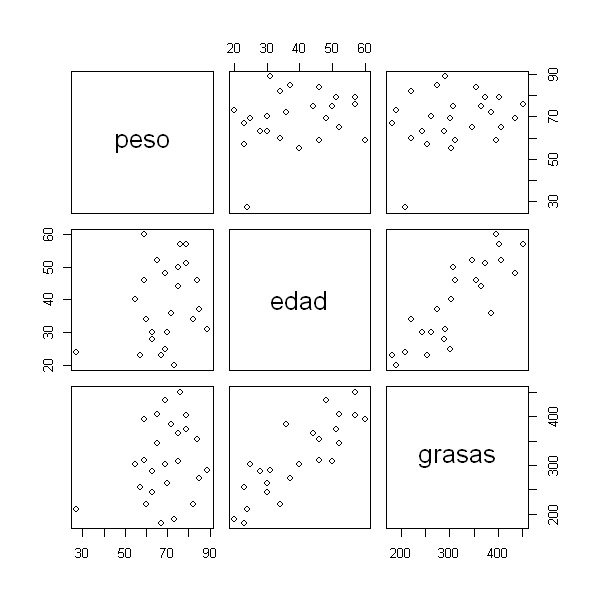

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
pairs(grasas)

In [3]:
cor(grasas)

,peso,edad,grasas
peso,1.0000000,0.2400133,0.2652935
edad,0.2400133,1.0000000,0.8373534
grasas,0.2652935,0.8373534,1.0000000


In [4]:
regresion <- lm(grasas ~ edad, data = grasas)
summary(regresion)


Call:
lm(formula = grasas ~ edad, data = grasas)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.478 -26.816  -3.854  28.315  90.881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.5751    29.6376   3.461  0.00212 ** 
edad          5.3207     0.7243   7.346 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.46 on 23 degrees of freedom
Multiple R-squared:  0.7012,	Adjusted R-squared:  0.6882 
F-statistic: 53.96 on 1 and 23 DF,  p-value: 1.794e-07


Los parámetros de la ecuación de la recta de mínimos cuadrados que relaciona la cantidad de grasas en la sangre en función del peso vienen dados por la columna ´Estimate´ de la tabla ´Coefficients´ de la salida anterior. Por lo tanto, en este ejemplo la ecuación de la recta de mínimos cuadrados es: $y = 102.575 + 5.321 x$

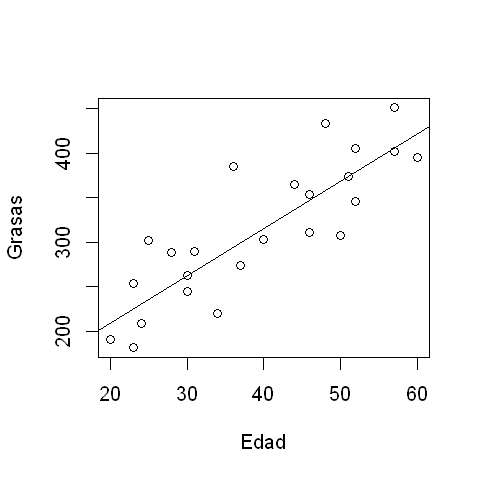

In [5]:
options(repr.plot.width=4, repr.plot.height=4)
plot(grasas$edad, grasas$grasas, xlab='Edad', ylab='Grasas')
abline(regresion)


El coeficiente de determinación (es decir, el coeficiente de correlación al cuadrado) mide la bondad del ajuste de la recta a los datos. A partir de la salida anterior, vemos que su valor en este caso es Multiple R-squared: 0.701

In [6]:
nuevas.edades <- data.frame(edad = seq(30, 50))
predict(regresion, nuevas.edades)

1        2        3        4        5        6        7        8 
262.1954 267.5161 272.8368 278.1575 283.4781 288.7988 294.1195 299.4402 
       9       10       11       12       13       14       15       16 
304.7608 310.0815 315.4022 320.7229 326.0435 331.3642 336.6849 342.0056 
      17       18       19       20       21 
347.3263 352.6469 357.9676 363.2883 368.6090

Suponemos ahora que los datos proceden de un modelo de regresión simple de la forma:
$$
y_i=\beta_0+\beta_1 x_i+\epsilon_i,\hspace{1cm} i=1,\cdots,n,
$$
donde los errores aleatorios ϵi son independientes con distribución normal de media 0 y varianza $σ^2$. Bajo este modelo,

- Los errores típicos de los estimadores de los parámetros $\beta_0$ y $\beta_1$ se encuentran en la columna Std Error de la salida anterior. En el ejemplo, sus valores son 29.638 y 0.724 respectivamente.

- La columna t value contiene el estadístico t, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los contrastes $H_0:\beta_0=0$ y $H_0:\beta_1=0$ . Los correspondientes p-valores aparecen en la columna $Pr(>|t|)$. En este caso son muy pequeños por lo que se rechazan ambas hipótesis para los niveles de significación habituales.

- El estimador de la desviación típica de los errores σ aparece como Residual standard error y su valor en el ejemplo es 43.5

- Los intervalos de confianza para los parámetros se obtienen con el comando confint. El parámetro level permite elegir el nivel de confianza (por defecto es 0.95):

### Ejemplo 2 <a class="anchor" id="ej2"></a>

Los siguientes ejemplos de regresión simple y múltiple se han obtenido del libro **Introduction to Statistical Learning** (Recomendado). El objetivo es mostrar los principales comandos en R para generar modelos lineales. Para obtener un modelo final robusto se tiene que analizar con más detalle cada una de las condiciones que se requieren para estos métodos.

El dataset Boston del paquete MASS recoge la mediana del valor de la vivienda en 506 áreas residenciales de Boston. Junto con el precio, se han registrado 13 variables adicionales.



In [7]:
# install.packages("MASS")
library(MASS)
library(ISLR)
data("Boston")

Warning message:
"package 'MASS' was built under R version 3.6.3"
Warning message:
"package 'ISLR' was built under R version 3.6.3"


- **crim**: ratio de criminalidad per cápita de cada ciudad.
- **zn**: Proporción de zonas residenciales con edificaciones de más de 25.000 pies cuadrados.
- **indus**: proporción de zona industrializada.
- **chas**: Si hay río en la ciudad (= 1 si hay río; 0 no hay).
- **nox**: Concentración de óxidos de nitrógeno (partes per 10 millón).
- **rm**: promedio de habitaciones por vivienda.
- **age**: Proporción de viviendas ocupadas por el propietario construidas antes de 1940.
- **dis**: Media ponderada de la distancias a cinco centros de empleo de Boston.
- **rad**: Índice de accesibilidad a las autopistas radiales.
- **tax**: Tasa de impuesto a la propiedad en unidades de $\$10,000.$
- **ptratio**: ratio de alumnos/profesor por ciudad.
- **black**: $1000(Bk - 0.63)^2$ donde Bk es la proporción de gente de color por ciudad.
- **lstat**: porcentaje de población en condición de pobreza.
- **medv**: Valor mediano de las casas ocupadas por el dueño en unidades de $\$1000$s.

In [8]:
# install.packages("psych")
library(psych)
# La variable chas es una variable categórica por lo que se transforma a factor
Boston$chas <- as.factor(Boston$chas)
summary(Boston)

Warning message:
"package 'psych' was built under R version 3.6.3"


      crim                zn             indus       chas         nox        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       rm             age              dis              rad        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

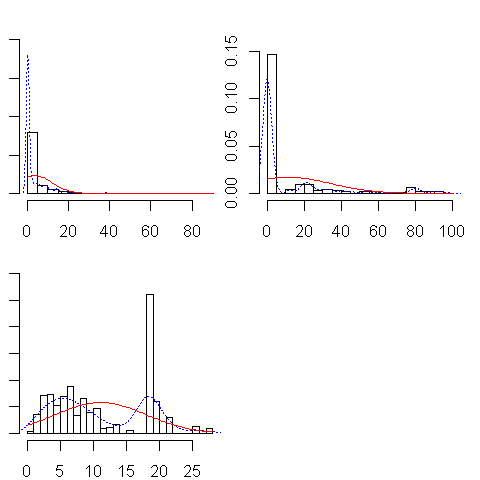

In [9]:
# Dado que hay muchas variables, se grafican por grupos de 4, excluyendo las
# categóricas
multi.hist(x = Boston[,1:3], dcol = c("blue","red"), dlty = c("dotted", "solid"),
           main = "")

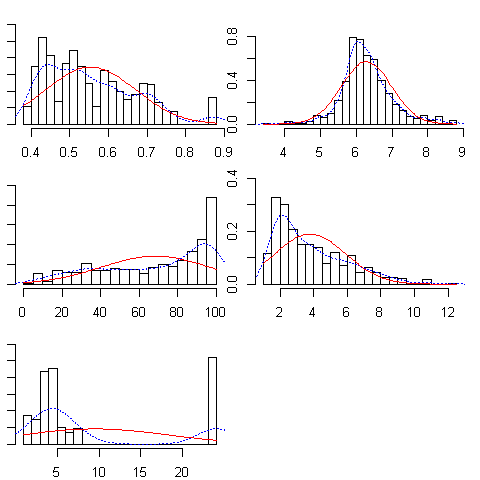

In [10]:
multi.hist(x = Boston[,5:9], dcol = c("blue","red"), dlty = c("dotted", "solid"),
           main = "")

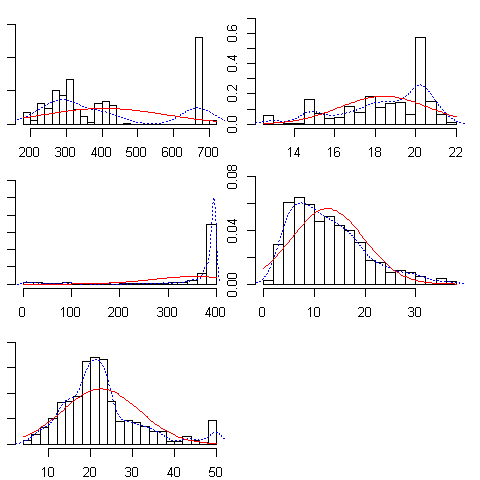

In [11]:
multi.hist(x = Boston[,10:14], dcol = c("blue","red"),
           dlty = c("dotted", "solid"), main = "")

In [12]:
modelo_simple <- lm(formula = medv ~ lstat, data = Boston)
summary(modelo_simple)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


En la información devuelta por el summary se observa que el $p$-value del estadístico $F$ es muy pequeño, indicando que al menos uno de los predictores del modelo está significativamente relacionado con la variable respuesta. Al tratarse de un modelo simple, el $p-$value de estadístico $F$ es el mismo que el $p$-value del estadístico $t$ del único predictor incluido en el modelo (lstat). La evaluación del modelo en conjunto puede hacerse a partir de los valores RSE o del valor $R^2$ devuelto en el summary.

Residual standar error (RSE): En promedio, cualquier predicción del modelo se aleja 6.216 unidades del verdadero valor. Teniendo en cuenta que el valor promedio de la variable respuesta medv es de 22.53, RSE es de $6.21622.53=27\%$.

$R^2$: El predictor lstatus empleado en el modelo es capaz de explicar el $54.44\%$ de la variabilidad observada en el precio de las viviendas.

La ventaja de $R^2$ es que es independiente de la escala en la que se mida la variable respuesta, por lo que su interpretación es más sencilla.

Los dos coeficientes de regresión ($\beta_0$ y $\beta_1$) estimados por el modelo son significativos y se pueden interpretar como:

- Intercept($\beta_0$): El valor promedio del precio de la vivienda cuando el lstatus es 0 es de 34.5538 unidades.
- Predictor lstat($\beta_1$): por cada unidad que se incrementa el predictor lstat el precio de la vivienda disminuye en promedio 0.9500 unidades.
- La estimación de todo coeficiente de regresión tiene asociada un error estándar, por lo tanto todo coeficiente de regresión tiene su correspondiente intervalo de confianza.

In [13]:
predict(object = modelo_simple, newdata = data.frame(lstat = c(10)),
        interval = "prediction", level = 0.95)

,fit,lwr,upr
1,25.05335,12.82763,37.27907


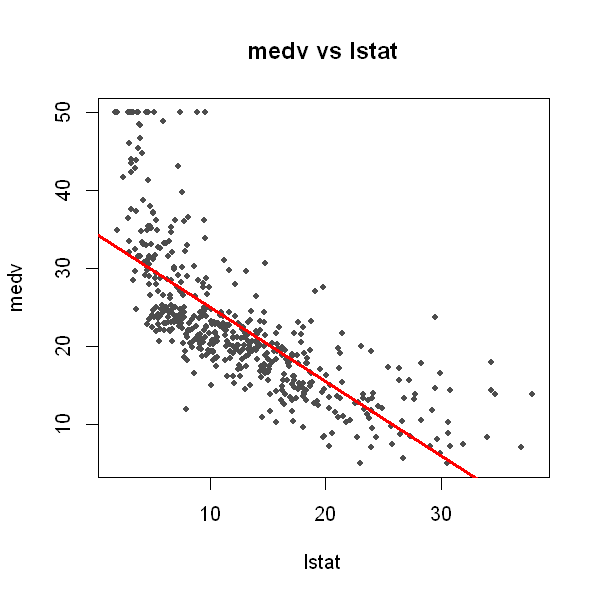

In [14]:
options(repr.plot.width=5, repr.plot.height=5)
attach(Boston)
plot(x = lstat, y = medv, main = "medv vs lstat", pch = 20, col = "grey30")
abline(modelo_simple, lwd = 3, col = "red")

$\text{precio medio vivienda} = 34.55-0.95\text{lstat}$

### Ejemplo 3 <a class="anchor" id="ej3"></a>

Se desea ajustar un modelo de regresión lineal simple para explicar la Resistencia de una soldadura en función de la Edad de la soldadura.

In [15]:
file <- "https://raw.githubusercontent.com/fhernanb/datos/master/propelente"
datos <- read.table(file=file, header=TRUE)
head(datos) # shows the first 6 rows

,Resistencia,Edad
,<dbl>,<dbl>
1,2158.70,15.50
2,1678.15,23.75
3,2316.00,8.00
4,2061.30,17.00
5,2207.50,5.50
6,1708.30,19.00


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




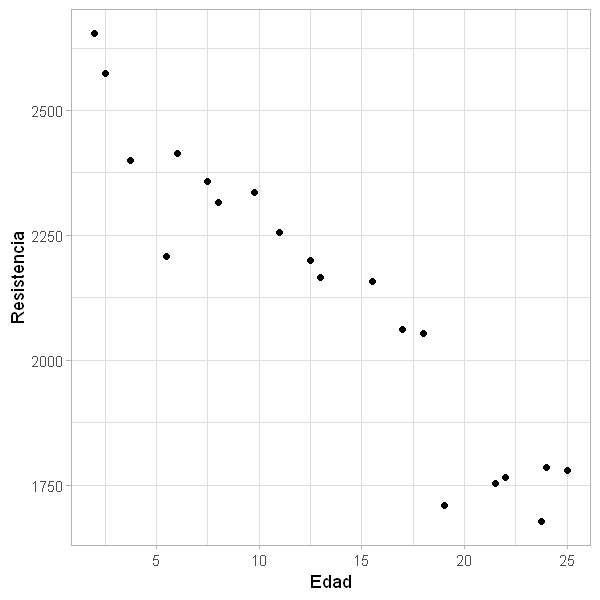

In [16]:
library(ggplot2)
ggplot(datos, aes(x=Edad, y=Resistencia)) + 
  geom_point() + theme_light()

El modelo que se quiere montar

\begin{align}
Resistencia_i &\sim N(\mu_i, \sigma^2), \\ 
\mu_i &= \beta_0 + \beta_1 Edad_i, \\
\sigma^2 &= \text{constante}
\end{align}

In [17]:
mod1 <- lm(Resistencia ~ Edad, data=datos)
summary(mod1) # Para imprimir el objeto mod1


Call:
lm(formula = Resistencia ~ Edad, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2627.822     44.184   59.48  < 2e-16 ***
Edad         -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10


Queda finalmente estimado como 
\begin{align}
\widehat{Resistencia}_i &\sim N(\hat{\mu}_i, \hat{\sigma}^2), \\ 
\hat{\mu}_i &= 2627.822 -37.154 \, Edad_i, \\
\hat{\sigma} &= 96.11
\end{align}

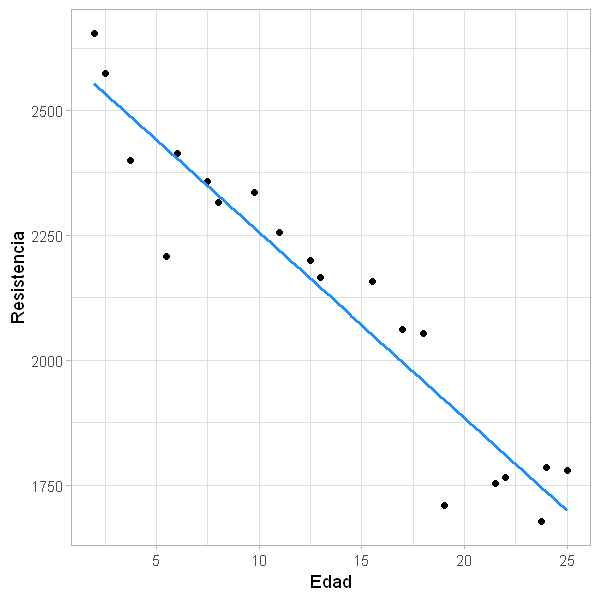

In [18]:
ggplot(datos, aes(x=Edad, y=Resistencia)) + 
  geom_point() +
  geom_smooth(method='lm', formula=y~x, se=FALSE, col='dodgerblue1') +
  theme_light()

In [19]:
datos$predicciones <- predict(mod1)

`geom_smooth()` using formula 'y ~ x'



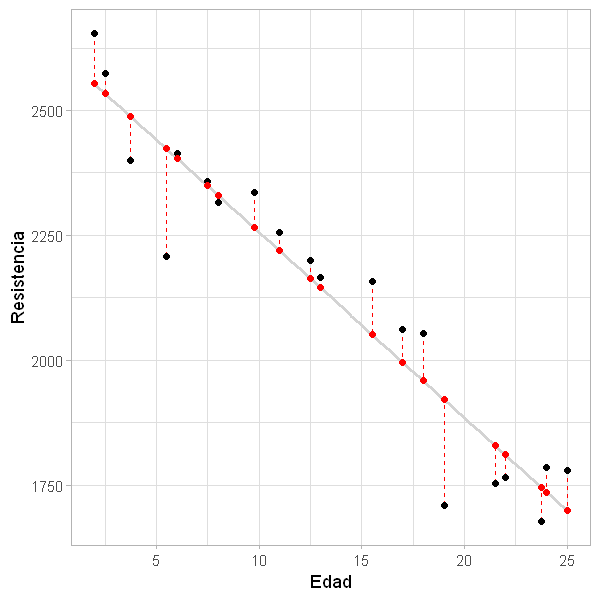

In [20]:
ggplot(datos, aes(x=Edad, y=Resistencia)) +
  geom_smooth(method="lm", se=FALSE, color="lightgrey") +
  geom_segment(aes(xend=Edad, yend=predicciones), col='red', lty='dashed') +
  geom_point() +
  geom_point(aes(y=predicciones), col='red') +
  theme_light()

### Ejemplo 4 <a class="anchor" id="ej4"></a>

In [21]:
# install.packages("tidyverse")
library(tidyverse)
data("Orange")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::%+%()   masks psych::%+%()
x ggplot2::alpha() masks psych::alpha()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x dplyr::select()  masks MASS::select()



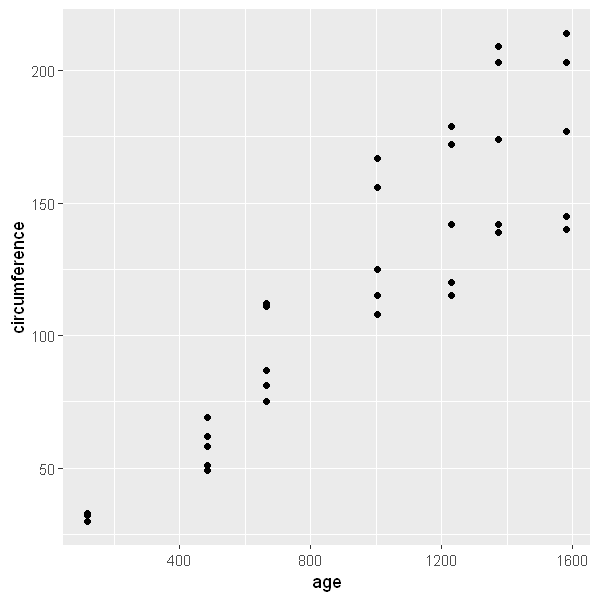

In [22]:
# problema/pregunta
# Cuanto medir? la circunferencias, en promedio, de un arbol de naranjas en a los 800 dias de plantarlo
Orange %>% 
  ggplot(aes(x = age,
             y = circumference)) +
  geom_point() 